In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, uniform
from scipy.optimize import minimize

## Question 2 (Modified Rejection Sampling)

* To draw samples from the target distribution $\pi(x)$, remember the procedure of Rejection Sampling (RS): 1) Draw initial samples $\{x_1,\dots,x_m\}$ from an envelope distribution $q(x)$, and calculate the corresponding ratios or weights $\{w_1,...,w_m\},w_j=w(x_j)=\pi(x_j)/q(x_j)$; 2) Calculate $C=\sup w(x)$, and accept each sample $x_j$ with the probability $p_j=w_j/C$ to obtain the final samples $\{x_1^*,\dots,x_n^*\}$. A modified version of RS is to replace $C$ by $\max w_j$. We will assume $m$ to be fixed and $n$ to be random, and check the difference between these two methods numerically. 

* (a) Obviously the first benefit of replacing $\sup w(x)$ by $\max w_j$ is that it saves efforts to calculate the maximum value especially when the shape of the target or proposal are complicated or non-smooth. Consider drawing samples from $\pi(x)=0.5N(x|-2,0.5^2)+0.5N(x|1,1^2)$ based on $q(x)=t_1(x)$. Draw the plot of $w(x)$ and calculate $C$. 

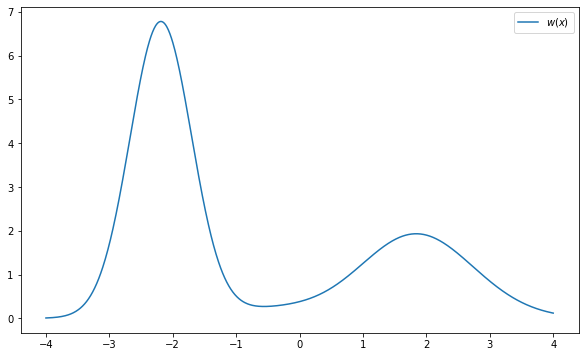

C = 6.780869339580882


In [2]:
pi = lambda x: 0.5*norm(loc=-2, scale=0.5).pdf(x) + 0.5*norm(loc=1, scale=1).pdf(x)
q = t(df=1)
w = lambda x: pi(x) / q.pdf(x)

x = np.linspace(-4, 4, 1000)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, w(x), label='$w(x)$')
ax.legend()
plt.show()

C = w(minimize(lambda x: -np.log(w(x)), x0=-2, tol=1e-10).x[0])
print('C = {}'.format(C))

* (b) We know that the expected acceptance rate for the original RS is just $1/C$. As $\max w_j<C$, the modified RS may have higher acceptance rate. Set $m=5, 10, 20, 50, 100, 200, 500, 1000$. Under each $m$, implement these two kinds of Rejection Sampling $K=3000$ times to estimate and compare their acceptance rates and calculate the probability that the modified version has more final samples. Display your results with plots or tables. 

In [3]:
def rejection(m):
    samples = q.rvs(size=m)
    weights = w(samples)
    acc1 = np.mean(uniform.rvs(size=m) <= weights / C)
    acc2 = np.mean(uniform.rvs(size=m) <= weights / weights.max())
    return acc1, acc2

def experiment(K, m):
    Acc1 = []
    Acc2 = []
    Prob = []
    for k in range(K):
        acc1, acc2 = rejection(m)
        Acc1.append(acc1)
        Acc2.append(acc2)
        Prob.append(acc1 < acc2)
        
    return np.mean(Acc1), np.mean(Acc2), np.mean(Prob)

1/C = 0.1475
m = 5, acc1 = 0.1475, acc2 = 0.4231, prob = 0.7423
m = 10, acc1 = 0.1470, acc2 = 0.3056, prob = 0.6867
m = 20, acc1 = 0.1478, acc2 = 0.2247, prob = 0.6117
m = 50, acc1 = 0.1467, acc2 = 0.1650, prob = 0.5220
m = 100, acc1 = 0.1481, acc2 = 0.1527, prob = 0.4983
m = 200, acc1 = 0.1485, acc2 = 0.1494, prob = 0.4750
m = 500, acc1 = 0.1476, acc2 = 0.1478, prob = 0.4857
m = 1000, acc1 = 0.1474, acc2 = 0.1475, prob = 0.4863


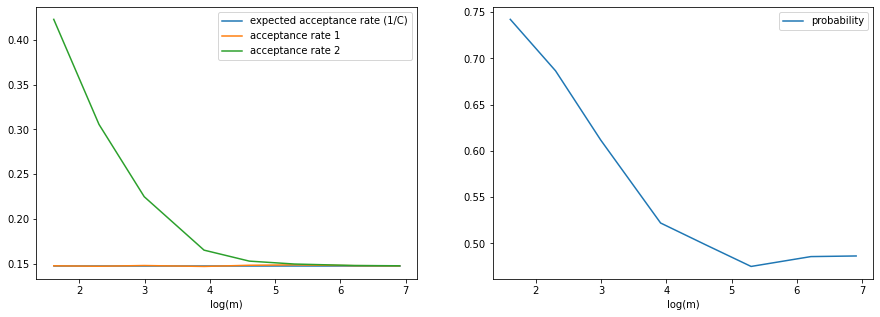

In [4]:
np.random.seed(19971107)
print('1/C = {:.4f}'.format(1/C))
M = [5, 10, 20, 50, 100, 200, 500, 1000]
Acc1 = []
Acc2 = []
Prob = []
for m in M:
    acc1, acc2, prob = experiment(3000, m)
    print('m = {}, acc1 = {:.4f}, acc2 = {:.4f}, prob = {:.4f}'.format(m, acc1, acc2, prob))
    Acc1.append(acc1)
    Acc2.append(acc2)
    Prob.append(prob)
    
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot([np.log(M[0]), np.log(M[-1])], [1/C, 1/C], label='expected acceptance rate (1/C)')
axs[0].plot(np.log(M), Acc1, label='acceptance rate 1')
axs[0].plot(np.log(M), Acc2, label='acceptance rate 2')
axs[0].set_xlabel('log(m)')
axs[0].legend()
axs[1].plot(np.log(M), Prob, label='probability')
axs[1].set_xlabel('log(m)')
axs[1].legend()
plt.show()

* (c) The third advantage is that different from $\sup w(x)$, $\max w_j$ can always be obtained even if the tail of $q(x)$ is lighter than that of $\pi(x)$. Consider a simple toy example that $\pi(x)=N(x|0,1^2)$, $q(x)=N(x|0,\sigma^2)$, how little $\sigma$ can be so that we can still obtain reasonable final samples (at least for very big $m$) in the sense that its histogram still looks like the target distribution? Use mathematics or simulations to justify your guess, rigorously or intuitively. 

In [5]:
def simulation(sigma, m):
    samples = norm(scale=sigma).rvs(size=m)
    weights = norm.pdf(samples) / norm(scale=sigma).pdf(samples)
    final_samples = samples[uniform.rvs(size=m) <= weights / weights.max()]
    print('final sample number: {}/{} (sigma = {}); acceptance rate: {:.6f}'
          .format(final_samples.size, m, sigma, final_samples.size / m))
    
    x = np.linspace(-4, 4, 1000)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, norm.pdf(x), label='$\pi(x)$')
    ax.hist(final_samples, bins=20, density=True, label='final samples')
    ax.legend()
    plt.show()

final sample number: 2579/10000 (sigma = 0.9); acceptance rate: 0.257900


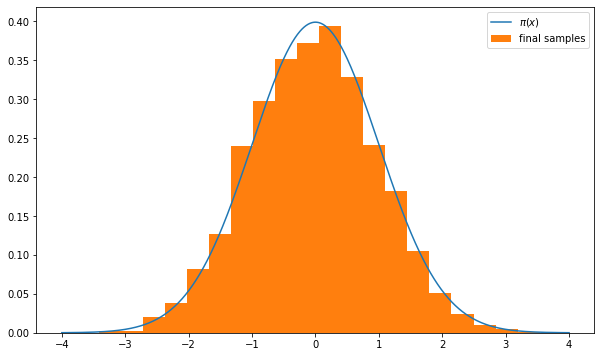

final sample number: 3346/100000 (sigma = 0.8); acceptance rate: 0.033460


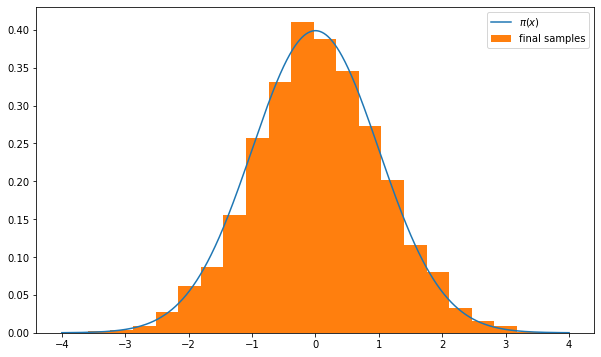

final sample number: 1333/1000000 (sigma = 0.7); acceptance rate: 0.001333


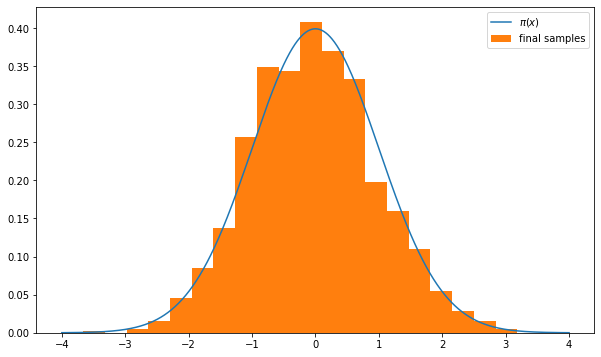

final sample number: 1724/10000000 (sigma = 0.6); acceptance rate: 0.000172


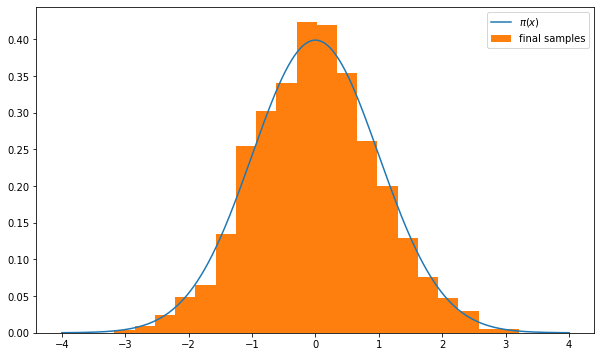

In [6]:
np.random.seed(19971107)
simulation(0.9, 10000)
simulation(0.8, 100000)
simulation(0.7, 1000000)
simulation(0.6, 10000000)

* (d) Finally, let's talk about some bad things about the modified RS procedure. It is actually a biased method, which means that the final samples do not follow the target distribution. Set $m=5$, $\pi(x)=N(x|0,1^2)$, $q(x)=N(x|0,3^2)$. Try to test the bias with histograms: Run $K=20000$ repetitions for both the RS before and after modification, for the $k$th repetition, obtain a group of final samples $\{x_{k,1}^*,\dots,x_{k,n_k}^*\}$ and assign weights $1/n_k$ for each sample in this group (there would be no sample to set the weights if $n_k=0$), finally pool the samples in the $K$ groups to get the weighted samples $\{(x_{1,1}^*,1/n_1),\dots,(x_{k,i}^*,1/n_k),\dots,(x_{K,n_K}^*,1/n_K)\}$ whose histogram with little bin width can be viewed as the expectation of the distribution of the final samples (conditional on that the final sample set is not empty). Compare the two obtained histograms in a single plot, where you should also draw the target density as a reference curve. 

In [7]:
def rejection(m):
    samples = norm.rvs(scale=3, size=m)
    weights = norm.pdf(samples) / norm(scale=3).pdf(samples)
    fsamples1 = samples[uniform.rvs(size=m) <= weights / 3]
    fsamples2 = samples[uniform.rvs(size=m) <= weights / weights.max()]
    return fsamples1, fsamples2

def experiment(K, m):
    Fsamples1 = []
    Weights1 = []
    Fsamples2 = []
    Weights2 = []
    for k in range(K):
        fsamples1, fsamples2 = rejection(m)
        Fsamples1 = np.append(Fsamples1, fsamples1)
        Weights1 = np.append(Weights1, np.ones_like(fsamples1)/fsamples1.size)
        Fsamples2 = np.append(Fsamples2, fsamples2)
        Weights2 = np.append(Weights2, np.ones_like(fsamples2)/fsamples2.size)
        
    x = np.linspace(-4, 4, 1000)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, norm.pdf(x), label='$\pi(x)$')
    ax.hist(Fsamples1, weights=Weights1, bins=50, density=True, histtype='step', label='final samples (RS)')
    ax.hist(Fsamples2, weights=Weights2, bins=50, density=True, histtype='step', label='final samples (modified RS)')
    ax.legend()
    plt.show()

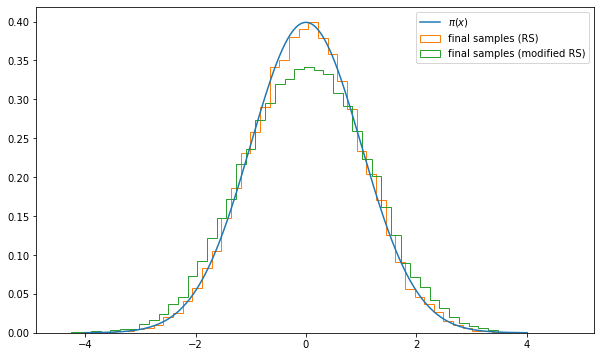

In [8]:
np.random.seed(19971107)
experiment(20000, 5)